In [1]:
import time
siamak = time.time()
import os
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.models import Sequential
import keras.backend as K
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from keras.layers import Layer
from sklearn.cluster import MeanShift
from collections import Counter
# from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer
np.set_printoptions(precision=3, suppress=True)

Using TensorFlow backend.


In [2]:
def load_nsl_kdd_cup_dataset(filename, n_column=41):
    with open(filename, 'r')as f:
        list1 = []
        list2 = []
        for i in f:
            list1.append(i)
            
        for i in list1:
            i = str(i)
            labels = i.split(sep=',')
            list2.append(labels[:n_column])
        arraylist = np.array(list2)
#         print(arraylist.shape)
        return arraylist

dirs = './NSL_KDD-master'
train_X = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTrain+.txt'))
test_X  = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTest+.txt'))
# print(test_X[3])
traindata_labels = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTrain+.txt'), n_column=42)
testdata_labels = load_nsl_kdd_cup_dataset(os.path.join(dirs, 'KDDTest+.txt'), n_column=42)

In [3]:
print(train_X.shape)
print(test_X.shape)

(125973, 41)
(22544, 41)


In [4]:
print(traindata_labels[40][41])

neptune


In [5]:
# Preprocessing phase 1
# Convert nominal values to numeric values
def convert_nominal_to_numerical(sets):
    list1 = []
    col1, col2, col3 = [], [], []
    for i in sets:
        # print(i[1])
        if i[1] == 'tcp':
            i[1] = 1
        elif i[1] == 'udp':
            i[1] = 2
        elif i[1] == 'icmp':
            i[1] = 3

        if i[2] == 'http':
            i[2] = 1
        elif i[2] == 'private':
            i[2] = 2
        elif i[2] == 'domain_u':
            i[2] = 3
        elif i[2] == 'smtp':
            i[2] = 4
        elif i[2] == 'ftp_data':
            i[2] = 5
        elif i[2] == 'eco_i':
            i[2] = 6
        elif i[2] == 'other':
            i[2] = 7
        elif i[2] == 'ecr_i':
            i[2] = 8
        elif i[2] == 'telnet':
            i[2] = 9
        elif i[2] == 'finger':
            i[2] = 10
        elif i[2] == 'ftp':
            i[2] = 11
        elif i[2] == 'auth':
            i[2] = 12
        elif i[2] == 'Z39_50':
            i[2] = 13
        elif i[2] == 'uucp':
            i[2] = 14
        elif i[2] == 'courier':
            i[2] = 15
        elif i[2] == 'bgp':
            i[2] = 16
        elif i[2] == 'whois':
            i[2] = 17
        elif i[2] == 'uucp_path':
            i[2] = 18
        elif i[2] == 'iso_tsap':
            i[2] = 19
        elif i[2] == 'time':
            i[2] = 20
        elif i[2] == 'imap4':
            i[2] = 21
        elif i[2] == 'nnsp':
            i[2] = 22
        elif i[2] == 'vmnet':
            i[2] = 23
        elif i[2] == 'urp_i':
            i[2] = 24
        elif i[2] == 'domain':
            i[2] = 25
        elif i[2] == 'ctf':
            i[2] = 26
        elif i[2] == 'csnet_ns':
            i[2] = 27
        elif i[2] == 'supdup':
            i[2] = 28
        elif i[2] == 'discard':
            i[2] = 29
        elif i[2] == 'http_443':
            i[2] = 30
        elif i[2] == 'daytime':
            i[2] = 31
        elif i[2] == 'gopher':
            i[2] = 32
        elif i[2] == 'efs':
            i[2] = 33
        elif i[2] == 'systat':
            i[2] = 34
        elif i[2] == 'link':
            i[2] = 35
        elif i[2] == 'exec':
            i[2] = 36
        elif i[2] == 'hostnames':
            i[2] = 37
        elif i[2] == 'name':
            i[2] = 38
        elif i[2] == 'mtp':
            i[2] = 39
        elif i[2] == 'echo':
            i[2] = 40
        elif i[2] == 'klogin':
            i[2] = 41
        elif i[2] == 'login':
            i[2] = 42
        elif i[2] == 'ldap':
            i[2] = 43
        elif i[2] == 'netbios_dgm':
            i[2] = 44
        elif i[2] == 'sunrpc':
            i[2] = 45
        elif i[2] == 'netbios_ssn':
            i[2] = 46
        elif i[2] == 'netstat':
            i[2] = 47
        elif i[2] == 'netbios_ns':
            i[2] = 48
        elif i[2] == 'ssh':
            i[2] = 49
        elif i[2] == 'kshell':
            i[2] = 50
        elif i[2] == 'nntp':
            i[2] = 51
        elif i[2] == 'pop_3':
            i[2] = 52
        elif i[2] == 'sql_net':
            i[2] = 53
        elif i[2] == 'IRC':
            i[2] = 54
        elif i[2] == 'ntp_u':
            i[2] = 55
        elif i[2] == 'rje':
            i[2] = 56
        elif i[2] == 'remote_job':
            i[2] = 57
        elif i[2] == 'pop_2':
            i[2] = 58
        elif i[2] == 'X11':
            i[2] = 59
        elif i[2] == 'printer':
            i[2] = 60
        elif i[2] == 'shell':
            i[2] = 61
        elif i[2] == 'urh_i':
            i[2] = 62
        elif i[2] == 'tim_i':
            i[2] = 63
        elif i[2] == 'red_i':
            i[2] = 64
        elif i[2] == 'pm_dump':
            i[2] = 65
        elif i[2] == 'tftp_u':
            i[2] = 66
        elif i[2] == 'http_8001':
            i[2] = 67
        elif i[2] == 'aol':
            i[2] = 68
        elif i[2] == 'harvest':
            i[2] = 69
        elif i[2] == 'http_2784':
            i[2] = 70

        if i[3] == 'SF':
            i[3] = 1
        elif i[3] == 'S0':
            i[3] = 2
        elif i[3] == 'REJ':
            i[3] = 3
        elif i[3] == 'RSTR':
            i[3] = 4
        elif i[3] == 'RSTO':
            i[3] = 5
        elif i[3] == 'S1':
            i[3] = 6
        elif i[3] == 'SH':
            i[3] = 7
        elif i[3] == 'S2':
            i[3] = 8
        elif i[3] == 'RSTOS0':
            i[3] = 9
        elif i[3] == 'S3':
            i[3] = 10
        elif i[3] == 'OTH':
            i[3] = 11

        # print(i)
        list1.append(i)
        col1.append(i[1])
        col2.append(i[2])
        col3.append(i[3])
    return list1, col1, col2, col3


In [6]:
def convert_list_to_array(list1):
    arrays = np.array(list1)
    return arrays

In [7]:
def plots(value1, value2, loss_or_acc, epochs):
    plt.plot(epochs, value1, 'b', label='training %s'%loss_or_acc)
    plt.plot(epochs, value2, 'bo', label='validation %s'%loss_or_acc)
    plt.xlabel('Epochs')
    plt.ylabel('%s'%loss_or_acc)
    if loss_or_acc == 'Accuracy' or loss_or_acc == 'accuracy' or loss_or_acc == 'acc':
        plt.axis([0, 40, 0, 1.1])
    plt.title('Training and validation %s'%loss_or_acc)
    plt.legend()
    plt.show()

In [8]:
def make_cluster(labels_with_cluster, num_cluster, n_column):
    array_cluster = np.copy(labels_with_cluster)
#     print(array_cluster.shape)
    clusters = []
    for index in range(len(array_cluster)):
        if array_cluster[index, n_column] == num_cluster:
            clusters.append(array_cluster[index])
    return convert_list_to_array(clusters)

In [9]:
def cut_cluster_column(cluster_with_cluster_label, cluster_col_num):
    list1 = []
    for index in cluster_with_cluster_label:
        list1.append(index[:cluster_col_num])
    return convert_list_to_array(list1)

In [10]:
def nominal_labels_2_numeric(labels):
    lst_label = np.copy(labels)
    for i in range(len(lst_label)):
        if lst_label[i] == 'normal':
            lst_label[i] = 0
        if lst_label[i] == 'dos':
            lst_label[i] = 1
        if lst_label[i] == 'probe':
            lst_label[i] = 2
        if lst_label[i] == 'r2l':
            lst_label[i] = 3
        if lst_label[i] == 'u2r':
            lst_label[i] = 4
    return(convert_list_to_array(list1=lst_label))

In [11]:
def cut_label(cluster_with_label, cut_col):
    lst = []
    for i in cluster_with_label:
        lst.append(i[cut_col:cut_col+1])
    return convert_list_to_array(lst)
        

In [12]:
def get_labels(data):
    label_list = []
    for i1 in data:
        label_list.append(i1[41])
    return label_list

In [13]:
def convert_labels_to_5_class(data):
    lst_label = np.copy(data)
    for index in range(len(lst_label)):
        if lst_label[index] == 'back' or lst_label[index] =='land' or lst_label[index] == 'neptune' or lst_label[index] == 'pod' or lst_label[index] == 'smurf' or lst_label[index] == 'teardrop' or lst_label[index] == 'apache2' or lst_label[index] == 'udpstorm' or lst_label[index] == 'processtable' or lst_label[index] == 'worm' or lst_label[index] == 'mailbomb':
            lst_label[index] = 'dos'
                
        if lst_label[index] == 'buffer_overflow' or lst_label[index] == 'loadmodule' or lst_label[index] == 'perl' or lst_label[index] ==  'rootkit' or lst_label[index] == 'sqlattack' or lst_label[index] == 'xterm' or lst_label[index] == 'ps':
            lst_label[index] = 'u2r'
                
        if lst_label[index] == 'guess_passwd' or lst_label[index] == 'ftp_write' or lst_label[index] == 'imap' or lst_label[index] == 'phf' or lst_label[index] == 'multihop' or lst_label[index] == 'spy' or lst_label[index] == 'warezclient' or lst_label[index] == 'warezmaster' or lst_label[index] == 'xlock' or lst_label[index] == 'xsnoop' or lst_label[index] == 'snmpguess' or lst_label[index] == 'snmpgetattack' or lst_label[index] == 'httptunnel' or lst_label[index] == 'sendmail' or lst_label[index] == 'named':
            lst_label[index] = 'r2l'
            
        if lst_label[index] == 'ipsweep' or lst_label[index] == 'nmap' or lst_label[index] == 'portsweep' or lst_label[index] == 'satan' or lst_label[index] == 'mscan' or lst_label[index] == 'saint':
            lst_label[index] = 'probe'
    return lst_label

In [14]:
# def newsig(weight_matrix):
#     return 10 * (1 / (1 + (K.exp(-0.0001 * weight_matrix))))
def initializer(weight_matrix):
    return K.random_uniform(shape=weight_matrix, minval=-1.2, maxval=0.8, seed=(142))

from keras.optimizers import Adam, SGD
adam = Adam(lr=0.001, beta_1=0.8, beta_2=0.899, epsilon=None, decay=0.0, amsgrad=False)
def build_model(loss_function):
    model = Sequential()
    model.add(Dense(25, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    input_shape=(25, )))
    model.add(Dense(15, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    model.add(Dense(15, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    model.add(Dense(25, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    model.add(Dense(15, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    model.add(Dense(10, activation='relu',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    model.add(Dense(5, activation='sigmoid',
                    kernel_initializer=initializer,
                    bias_initializer='zeros'))
    
    model.compile(optimizer=adam, loss=loss_function, metrics=['accuracy'])
    return model



def build_model2(loss_function):
    model2 = Sequential()
    model2.add(Dense(25, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros',
                     input_shape=(25, )))
    model2.add(Dense(15, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    model2.add(Dense(15, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    model2.add(Dense(25, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    model2.add(Dense(15, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    model2.add(Dense(10, activation='sigmoid',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    model2.add(Dense(5, activation='linear',
                     kernel_initializer=initializer,
                     bias_initializer='zeros'))
    
    model2.compile(optimizer=adam, loss=loss_function, metrics=['accuracy'])
    return model2




def k_fold(k_num, train_datas, train_labels, epochs, build_models, loss_func='categorical_crossentropy',
           batch_size=128):
    num_validation_samples = len(train_datas) // k_num
    loss_list = []
    val_loss_list = []
    acc_list = []
    val_acc_list = []
    all_scores = []
    print('training... please wait')
    for i in range(k_num):
        val_datas = train_datas[i * num_validation_samples:(i + 1) * num_validation_samples]
        val_labels = train_labels[i * num_validation_samples:(i + 1) * num_validation_samples]
        
        partial_train_datas = np.concatenate([train_datas[:i * num_validation_samples],
                                              train_datas[(i + 1) * num_validation_samples:]],
                                             axis=0)
        partial_train_labels = np.concatenate([train_labels[:i * num_validation_samples],
                                               train_labels[(i + 1) * num_validation_samples:]],
                                              axis=0)
        network = build_models(loss_function=loss_func)
        historys = network.fit(partial_train_datas, partial_train_labels,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              validation_data=(val_datas, val_labels))
        _, val_accus = network.evaluate(val_datas, val_labels)
        losses = historys.history['loss']
        val_losses = historys.history['val_loss']
        accs = historys.history['acc']
        val_accs = historys.history['val_acc']
        
        loss_list.append(losses)
        val_loss_list.append(val_losses)
        acc_list.append(accs)
        val_acc_list.append(val_accs)
        all_scores.append(val_accus)
    print('train finished')
    return all_scores, loss_list, val_loss_list, acc_list, val_acc_list

def averages(data, num_epochs):
    avrg = [np.mean([x[i] for x in data]) for i in range(num_epochs)]
    return avrg

In [15]:
def metrics_binary_1node(y_pred, y_test):
    if not np.array(y_pred).shape[0] == np.array(y_test).shape[0]:
        print('Error, prediction shape must be equal to y_test shape')
        exit(-1)

    TP = 0.
    TN = 0.
    FP = 0.
    FN = 0.
#     for i in range(len(y_test)):
    for i in range(y_test.shape[0]):
        if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
            if np.argmax(y_test[i]) == 0:
                TN += 1
            else:
                TP += 1
        else:
            if np.argmax(y_test[i]) == 0:
                FP += 1
            else:
                FN += 1
    confuion_matrix = np.array([[TP, FP], [FN, TN]])
    P = TP + FN
    N = FP + TN
    P_hat = TP + FP
    N_hat = FN + TN
    # precision = positive predictive value (PPV) = TP / P-hat
    precision = TP / (P_hat + 1e-7)  # P_hat = TP + FP -> TP / (TP + FP)
    print('precision', precision)
    # False pos rate = false acceptance = type I error rate = FP / N = 1-spec
    FPR = FP / (N + 1e-7)  # -> FP / (FP + TN)
    print('FPR', FPR)
    # Sensitivity = recall = True pos rate = hit rate = TP / P = 1-FNR
    TPR = sensitivity = recall = TP / (P + 1e-7)  # -> TP / (TP + FN)
    # TPR = sensitivity  # Recall
    print('TPR', TPR)
    print('Recall', recall)
    # False neg rate = false rejection = type II error rate = FN / P = 1-TPR
    FNR = FN / (P + 1e-7)  # -> FN / (TP + FN)
    print('FNR', FNR)
    # Specificity = TN / N = 1 - FPR
    specificity = TN / (N + 1e-7)  # -> TN / (FP + TN)
    print('specificity', specificity)
    # Accuracy = (TP+TN)/(P+N) -> same as success rate
    accuracy = (TP + TN) / (P + N + 1e-7)  # -> (TP + TN) / (TP + FN + FP + TN)
    print('accuracy', accuracy)
    # F-score or F-measure is the harmonic mean of the precision and recall
    # F_score = (2 * precision * TPR) / (precision + TPR)
    F_score = (2.0 * precision * recall) / (precision + recall + 1e-7)
    print('F_score', F_score)
    print('FN', FN)
    print('FP', FP)
    print('TP', TP)
    print('TN', TN)
    
    observed_accuracy = (TP + TN) / (TP + FP + FN + TN)
    po=observed_accuracy
    denominator=np.power((TP + FP + FN + TN),2)
    expected_accuracy = [(TP + FP)*(TP + FN) + (FN + TN)*(FP + TN)] / denominator
    pe=expected_accuracy
    Cohens_kappa = (po - pe)/(1 - pe)
    print('Cohens_kappa',Cohens_kappa)

    return F_score,accuracy,specificity,FNR,TPR,FPR,precision,Cohens_kappa

In [16]:
def s_and_sum_s(s):
    list_s = []
    sum_s = np.sum(s)
    for i in range(len(s)):
    #     print(i + 1, ':  ', s[i] / sum_s)
        list_s.append(s[i] / sum_s)



    a = 0
    counter_for = 1
    for i in list_s:
        a = a + i
        print(counter_for, ':  ', a)
        counter_for += 1
    return list_s

In [17]:
import tensorflow as tf
import random as rn

os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.set_random_seed(89)

from keras import backend as K

session_conf = tf.ConfigProto(
      intra_op_parallelism_threads=1,
      inter_op_parallelism_threads=1)

#Force Tensorflow to use a single thread
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)

K.set_session(sess)

In [18]:
train_labels_list = get_labels(traindata_labels)
test_labels_list = get_labels(testdata_labels)
train_labels = convert_labels_to_5_class(train_labels_list)
test_labels = convert_labels_to_5_class(test_labels_list)

print(Counter(train_labels))
print('******************************************************************')
print(Counter(test_labels))

train_numerical_label = nominal_labels_2_numeric(train_labels)
test_numerical_label = nominal_labels_2_numeric(test_labels)
print('------------------------------------------------------------------')
print(Counter(train_numerical_label))
print('******************************************************************')
print(Counter(test_numerical_label))

Counter({'normal': 67343, 'dos': 45927, 'probe': 11656, 'r2l': 995, 'u2r': 52})
******************************************************************
Counter({'normal': 9711, 'dos': 7460, 'r2l': 2885, 'probe': 2421, 'u2r': 67})
------------------------------------------------------------------
Counter({'0': 67343, '1': 45927, '2': 11656, '3': 995, '4': 52})
******************************************************************
Counter({'0': 9711, '1': 7460, '3': 2885, '2': 2421, '4': 67})


In [19]:
X_train_data, _, _, _ = convert_nominal_to_numerical(train_X)
X_test_data, _, _, _ = convert_nominal_to_numerical(test_X)

In [20]:
print(X_train_data[12])
print(np.array(X_test_data).shape)

['0' '1' '1' '1' '287' '2251' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '3' '7' '0.00' '0.00' '0.00' '0.00' '1.00' '0.00'
 '0.43' '8' '219' '1.00' '0.00' '0.12' '0.03' '0.00' '0.00' '0.00' '0.00']
(22544, 41)


In [21]:
train_numerical_label_reshaped = np.reshape(train_numerical_label, (-1, 1))
X_train_data = np.hstack((X_train_data, train_numerical_label_reshaped))
print(X_train_data.shape)

(125973, 42)


In [22]:
print(X_train_data[420][41])

0


In [23]:
# Over-sampling
lst_prob = []
lst_r2l = []
lst_u2r = []
for i in range(len(X_train_data)):
    if X_train_data[i][41] == '2':
        lst_prob.append(X_train_data[i])
    if X_train_data[i][41] == '3':
        lst_r2l.append(X_train_data[i])
    if X_train_data[i][41] == '4':
        lst_u2r.append(X_train_data[i])

In [24]:
print(np.array(lst_u2r).shape)

(52, 42)


In [25]:
# prob = cut_cluster_column(lst_prob, 41)
# r2l = cut_cluster_column(lst_r2l, 41)
# u2r = cut_cluster_column(lst_u2r, 41)
prob = convert_list_to_array(lst_prob)
r2l = convert_list_to_array(lst_r2l)
u2r = convert_list_to_array(lst_u2r)

In [26]:
print(prob.shape)
print(r2l.shape)
print(u2r.shape)

(11656, 42)
(995, 42)
(52, 42)


In [27]:
print(X_train_data.shape)

(125973, 42)


In [28]:
prob = np.vstack((prob, prob))
np.random.seed(seed=42)
np.random.shuffle(prob)

In [29]:
r2l = np.vstack((r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l,
                 r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l, r2l))
np.random.shuffle(r2l)

In [30]:
u2r = np.vstack((u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r,
                 u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r, u2r))
np.random.shuffle(u2r)

In [31]:
X_train_data = np.vstack((X_train_data, prob, r2l, u2r))

In [32]:
print(X_train_data.shape)

(209885, 42)


In [33]:
train_numerical_label = get_labels(X_train_data)

In [34]:
print(np.array(train_numerical_label).shape)

(209885,)


In [35]:
print(train_numerical_label[:20])
print(Counter(train_numerical_label))

['0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '3', '1', '1', '0', '2', '0', '0']
Counter({'0': 67343, '1': 45927, '3': 40795, '2': 34968, '4': 20852})


In [36]:
train_numerical_label = convert_list_to_array(train_numerical_label)
X_train_data = cut_cluster_column(X_train_data, 41)

In [37]:
print(X_train_data.shape)

(209885, 41)


In [38]:
normalizer_scalers = MinMaxScaler()

In [39]:
normalizer_scalers.fit(X_train_data)

/home/siamak/Projects/PycharmProjects/deep/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U15 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
normalizer_normalized_X = normalizer_scalers.transform(X_train_data)
normalizer_normalized_X_test = normalizer_scalers.transform(X_test_data)
normalizer_normalized_X = normalizer_normalized_X.astype('float32')
normalizer_normalized_X_test = normalizer_normalized_X_test.astype('float32')

In [41]:
print(normalizer_normalized_X[12])

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.014
 0.    0.    0.    0.    1.    0.    0.43  0.031 0.859 1.    0.    0.12
 0.03  0.    0.    0.    0.   ]


In [42]:
U_train, s_train, V_train = np.linalg.svd(normalizer_normalized_X, full_matrices=False)
U_test, s_test, V_test = np.linalg.svd(normalizer_normalized_X_test, full_matrices=False)

In [43]:
print(U_train.shape)
print(U_test.shape)

(209885, 41)
(22544, 41)


In [44]:
_ = s_and_sum_s(s_train)

1 :   0.1997678130865097
2 :   0.33153609931468964
3 :   0.4328949898481369
4 :   0.5077635571360588
5 :   0.5706035569310188
6 :   0.6228499449789524
7 :   0.660377249121666
8 :   0.6943336874246597
9 :   0.725265497341752
10 :   0.7540298514068127
11 :   0.7802253309637308
12 :   0.8019809182733297
13 :   0.822196589782834
14 :   0.8401552140712738
15 :   0.8568278532475233
16 :   0.873005660250783
17 :   0.887196121737361
18 :   0.9004504485055804
19 :   0.9111043009907007
20 :   0.9210279975086451
21 :   0.9304764848202467
22 :   0.9395907018333673
23 :   0.9484028657898307
24 :   0.9565645353868604
25 :   0.9644382586702704
26 :   0.9715622374787927
27 :   0.9773942935280502
28 :   0.9817750104703009
29 :   0.985046625835821
30 :   0.9882197247352451
31 :   0.990908894687891
32 :   0.9933423530310392
33 :   0.9951627315022051
34 :   0.9966572806006297
35 :   0.997887552017346
36 :   0.9986683372990228
37 :   0.9992353306151927
38 :   0.9996879559475929
39 :   0.9999882446427364
40

In [45]:
input_layer1 = Input(shape=(41,))
h1 = 0
h2 = 0
h3 = 0
h4 = 0
h5 = 0
h6 = 0 
h7 = 0
IDS_autoencoder1 = 0
h1 = Dense(41, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(input_layer1)
h2 = Dense(20, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(h1)

h3 = Dense(11, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(h2)
h4 = Dense(2, activation='relu',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')(h3)
h5 = Dense(11, activation='relu',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')(h4)

h6 = Dense(20, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(h5)
h7 = Dense(41, activation='sigmoid')(h6)

IDS_autoencoder1 = Model(inputs=input_layer1, outputs=h7)

In [46]:
IDS_autoencoder1.compile(optimizer='adam', loss='mean_squared_error')
IDS_autoencoder1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 41)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 41)                1722      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                840       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                231       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 11)                33        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                240       
__________

In [47]:
AEC_hist = IDS_autoencoder1.fit(normalizer_normalized_X, normalizer_normalized_X, epochs=30, batch_size=128)

Epoch 1/30
209885/209885 [==============================] - 3s 16us/step - loss: 0.0344
Epoch 2/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0165
Epoch 3/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0145
Epoch 4/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0137
Epoch 5/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0133
Epoch 6/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0131
Epoch 7/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0129
Epoch 8/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0128
Epoch 9/30
209885/209885 [==============================] - 3s 14us/step - loss: 0.0127
Epoch 10/30
209885/209885 [==============================] - 3s 15us/step - loss: 0.0126
Epoch 11/30
209885/209885 [==============================] - 3s 14us/step - loss: 0.0125
Epoch 12/30
209885/209885 [===

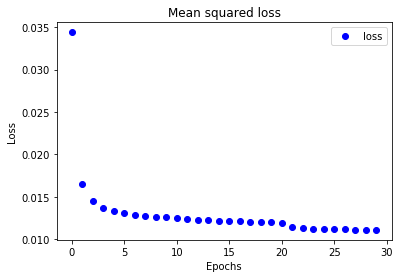

In [48]:
aec_loss = AEC_hist.history['loss']
plt.plot(range(30), aec_loss, 'bo', label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Mean squared loss')
plt.show()

In [49]:
# after normalized
IDS_autoencoder2 = Model(inputs=input_layer1, outputs=h4)
X_2d = IDS_autoencoder2.predict(normalizer_normalized_X)
X_2d_test = IDS_autoencoder2.predict(normalizer_normalized_X_test)

226.25481605529785


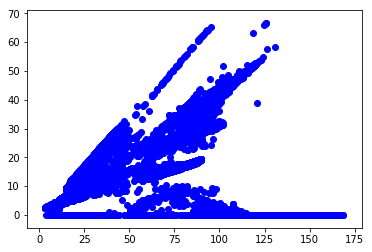

In [50]:
# scattered after normalized
t1 = time.time()
for i in range(22544):
    plt.scatter(X_2d[i][0], X_2d[i][1], color='blue')
t2 = time.time()
print(t2 - t1)
plt.show()

226.37874960899353


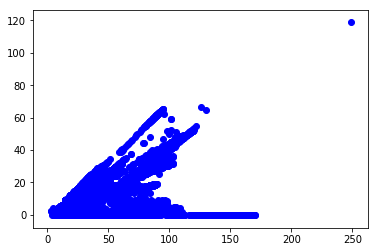

In [51]:
# scattered after normalized
t1 = time.time()
for i in range(len(X_2d_test)):
    plt.scatter(X_2d_test[i][0], X_2d_test[i][1], color='blue')
t2 = time.time()
print(t2 - t1)
plt.show()

In [52]:
input_layer = Input(shape=(41,))
encoded_layer = 0 
encoded_decoded_layer = 0
decoded_layer = 0
IDS_autoencoder2 = 0
IDS_autoencoder_test = 0

encoded_layer = Dense(41, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(input_layer)
encoded_layer = Dense(30, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(encoded_layer)
# encoded = Dense(10, activation='relu')(encoded)

encoded_decoded_layer = Dense(25, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(encoded_layer)
decoded_layer = Dense(30, activation='relu',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(encoded_decoded_layer)
decoded_layer = Dense(41, activation='sigmoid',
                      kernel_initializer=initializer,
                      bias_initializer='zeros')(decoded_layer)

IDS_autoencoder2 = Model(inputs=input_layer, outputs=decoded_layer)
IDS_autoencoder_test = Model(inputs=input_layer, outputs=decoded_layer)

In [53]:
IDS_autoencoder2.compile(optimizer=adam, loss='mean_squared_error')
IDS_autoencoder_test.compile(optimizer=adam, loss='mean_squared_error')

In [54]:
AEC2_hist = IDS_autoencoder2.fit(normalizer_normalized_X, normalizer_normalized_X,
                                 epochs=10, batch_size=128)
AEC_test = IDS_autoencoder_test.fit(normalizer_normalized_X_test, normalizer_normalized_X_test,
                                    epochs=10, batch_size=128)

Epoch 1/10
209885/209885 [==============================] - 3s 16us/step - loss: 0.0236
Epoch 2/10
209885/209885 [==============================] - 3s 15us/step - loss: 0.0043
Epoch 3/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0039
Epoch 4/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0035
Epoch 5/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0032
Epoch 6/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0027
Epoch 7/10
209885/209885 [==============================] - 3s 15us/step - loss: 0.0023
Epoch 8/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0020
Epoch 9/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0017
Epoch 10/10
209885/209885 [==============================] - 3s 14us/step - loss: 0.0017
Epoch 1/10
22544/22544 [==============================] - 1s 25us/step - loss: 0.0039
Epoch 2/10
22544/22544 [=========

In [55]:
aec2 = AEC2_hist.history['loss']
aec_test = AEC_test.history['loss']

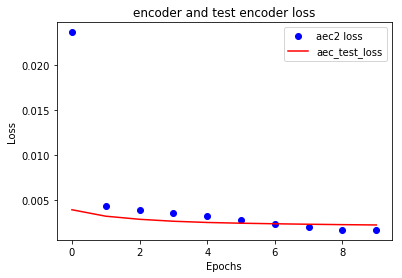

In [56]:
plt.plot(range(10), aec2, 'bo', label='aec2 loss')
plt.plot(range(10), aec_test, 'r', label='aec_test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('encoder and test encoder loss')
plt.show()

In [57]:
prd_ids2 = IDS_autoencoder2.predict(normalizer_normalized_X)
print(prd_ids2.shape)

(209885, 41)


In [58]:
for i in range(len(prd_ids2[0])):
    print(i, '--', prd_ids2[310][i], '**************', normalizer_normalized_X[310][i])

0 -- 2.0030102e-14 ************** 0.0
1 -- 7.4000186e-14 ************** 0.0
2 -- 0.15787686 ************** 0.1884058
3 -- 0.076506086 ************** 0.1
4 -- 2.2979818e-15 ************** 0.0
5 -- 6.085084e-13 ************** 0.0
6 -- 1.5128751e-17 ************** 0.0
7 -- 5.540121e-24 ************** 0.0
8 -- 7.2853203e-25 ************** 0.0
9 -- 8.206403e-13 ************** 0.0
10 -- 5.6138516e-26 ************** 0.0
11 -- 2.9779662e-06 ************** 0.0
12 -- 2.2226437e-17 ************** 0.0
13 -- 2.7965121e-24 ************** 0.0
14 -- 5.157949e-19 ************** 0.0
15 -- 1.2679437e-22 ************** 0.0
16 -- 3.4851878e-26 ************** 0.0
17 -- 4.749082e-18 ************** 0.0
18 -- 5.3658616e-16 ************** 0.0
19 -- 1.5757117e-17 ************** 0.0
20 -- 1.29958114e-17 ************** 0.0
21 -- 1.7115585e-20 ************** 0.0
22 -- 0.26915646 ************** 0.27201566
23 -- 8.461296e-14 ************** 0.025440313
24 -- 0.9999651 ************** 1.0
25 -- 0.99870026 **************

In [59]:
IDS_autoencoder3 = Model(inputs=input_layer, outputs=encoded_decoded_layer)
ids3_pred = IDS_autoencoder3.predict(normalizer_normalized_X)

IDS_autoencoder_test2 = Model(inputs=input_layer, outputs=encoded_decoded_layer)
ids_test2_pred = IDS_autoencoder_test2.predict(normalizer_normalized_X_test)

In [60]:
print(ids3_pred.shape)
print(ids_test2_pred.shape)

(209885, 25)
(22544, 25)


In [61]:
ms_start_time = time.time()
ms_train = MeanShift()
ms_train.fit(ids3_pred)
ms_train_labels = ms_train.labels_
ms_end_time = time.time()
print(ms_end_time - ms_start_time)
print(ms_train_labels[:300])

16849.49555182457
[0 0 1 0 0 2 1 1 1 1 2 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 2 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 0 2 0 0 0 0 0 1 1 0 0 2 2 0 2 0 2 1 2 1 0 1 0 0
 1 0 1 0 0 2 0 2 1 0 0 1 0 1 2 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0
 0 2 0 0 2 2 0 0 0 2 2 1 0 1 0 0 0 0 0 1 2 0 0 1 1 0 0 0 1 0 2 2 0 0 0 1 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 2 0 0 0 0 1 0 0 2 1 1 2 2 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 1 2 0 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 2 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 2 1 0 0 0 2
 0 1 0 0 2 0 0 0 0 0 1 0 2 2 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 2 0 1 1 0 0 0
 0 0 0 1]


In [62]:
ms_train_n_cluster = len(np.unique(ms_train_labels))
print(ms_train_n_cluster)
print(Counter(ms_train_labels))

3
Counter({0: 146844, 1: 35871, 2: 27170})


In [63]:
ms_start_time = time.time()
ms_test = MeanShift()
ms_test.fit(ids_test2_pred)
ms_test_labels = ms_test.labels_
ms_end_time = time.time()
print(ms_end_time - ms_start_time)
print(ms_test_labels[:300])

217.68659496307373
[1 1 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 1 1 2 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 2 0 0 0 1 0 2 0 2 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 2 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 2 1 1 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 2 0 0 1 0 0 0 2 1 0 0 0 1 0 0 0 0 2 0 0 0 1 0 1 0 0 0 1 1 0 0 2 1
 0 0 0 2 0 0 0 1 0 1 2 2 1 2 1 1 0 2 2 0 0 2 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 2 1 2 0 0 2 2 0 0 0 0 0 2 1 2 0 0
 0 0 0 0 1 1 2 0 0 0 0 1 0 2 1 1 0 0 0 1 1 0 0 0 2 2 0 0 1 0 2 0 0 1 0 0 0
 2 0 1 0]


In [64]:
ms_test_n_cluster = len(np.unique(ms_test_labels))
print(ms_test_n_cluster)
print(Counter(ms_test_labels))

3
Counter({0: 15828, 1: 4181, 2: 2535})


In [65]:
copysho_daram = np.copy(ms_test_labels)

In [66]:
# for i in range(len(ms_test_labels)):
#     if ms_test_labels[i] == 2:
#         ms_test_labels[i]=1
# print(copysho_daram[:20])
# print(ms_test_labels[:20])

In [67]:
ms_train_labels = np.reshape(ms_train_labels, (-1, 1))
ms_test_labels = np.reshape(ms_test_labels, (-1, 1))

reshaped_train_numerical_label = np.reshape(train_numerical_label, (-1, 1))
reshaped_test_numerical_label = np.reshape(test_numerical_label, (-1, 1))

#stack train and test data with its labels
stacked_train_data_and_label = np.hstack((ids3_pred, reshaped_train_numerical_label))
stacked_test_data_and_label = np.hstack((ids_test2_pred, reshaped_test_numerical_label))

# stack train and test data that stacked in the last step with meanshift's labels 
stacked_train_array = np.hstack((stacked_train_data_and_label, ms_train_labels))
stacked_test_array = np.hstack((stacked_test_data_and_label, ms_test_labels))

In [68]:
print(stacked_train_array.shape)
print(stacked_test_array.shape)

(209885, 27)
(22544, 27)


In [69]:
# make train cluster
cluster_train_0 = make_cluster(stacked_train_array, str(0), 26)
cluster_train_1 = make_cluster(stacked_train_array, str(1), 26)
cluster_train_2 = make_cluster(stacked_train_array, str(2), 26)

cluster_train_0_ready = cut_cluster_column(cluster_train_0, 25)
cluster_train_1_ready = cut_cluster_column(cluster_train_1, 25)
cluster_train_2_ready = cut_cluster_column(cluster_train_2, 25)

# make test cluster
cluster_test_0 = make_cluster(stacked_test_array, str(0), 26)
cluster_test_1 = make_cluster(stacked_test_array, str(1), 26)
cluster_test_2 = make_cluster(stacked_test_array, str(2) ,26)

cluster_test_0_ready = cut_cluster_column(cluster_test_0, 25)
cluster_test_1_ready = cut_cluster_column(cluster_test_1, 25)
cluster_test_2_ready = cut_cluster_column(cluster_test_2, 25)

In [70]:
print(cluster_test_0_ready.shape)
print(cluster_train_0_ready.shape)

(15828, 25)
(146844, 25)


In [71]:
# label ready for each cluster
label_train0 = cut_label(cluster_train_0, 25) 
label_train1 = cut_label(cluster_train_1, 25)
label_train2 = cut_label(cluster_train_2, 25)

label_test0 = cut_label(cluster_test_0, 25)
label_test1 = cut_label(cluster_test_1, 25)
label_test2 = cut_label(cluster_test_2, 25)

cat_test_numerical_label = to_categorical(test_numerical_label, num_classes=5)
cat_train_numerical_label = to_categorical(train_numerical_label, num_classes=5)
# all_test_data = cut_cluster_column(stacked_test_data_and_label, 7)

In [72]:
# make categorical label
cat_label_train0 = to_categorical(label_train0, num_classes=5)
cat_label_train1 = to_categorical(label_train1, num_classes=5)
cat_label_train2 = to_categorical(label_train2, num_classes=5)

cat_label_test0 = to_categorical(label_test0, num_classes=5)
cat_label_test1 = to_categorical(label_test1, num_classes=5)
cat_label_test2 = to_categorical(label_test2, num_classes=5)

In [73]:
del(train_X)
del(test_X)
del(traindata_labels)
del(testdata_labels)
del(train_labels_list)
del(test_labels_list)
del(train_labels)
del(test_labels)
del(X_train_data)
del(X_test_data)
del(train_numerical_label_reshaped)
del(lst_prob)
del(lst_r2l)
del(lst_u2r)
del(prob)
del(r2l)
del(u2r)
del(U_train)
del(s_train)
del(V_train)
del(U_test)
del(s_test)
del(V_test)
del(AEC_hist)
del(X_2d)
del(X_2d_test)
del(AEC2_hist)
del(AEC_test)
del(prd_ids2)
del(reshaped_train_numerical_label)
del(reshaped_test_numerical_label)
del(stacked_train_data_and_label)
del(stacked_test_data_and_label)
del(stacked_train_array)
del(stacked_test_array)
del(cluster_train_0)
del(cluster_train_1)
del(cluster_train_2)
del(cluster_test_0)
del(cluster_test_1)
del(cluster_test_2)
del(label_train0)
del(label_train1)
del(label_train2)
del(label_test0)
del(label_test1)
del(label_test2)

In [74]:
# faze train
# cluster 0
# scores0, loss0, val_loss0, acc0, val_acc0 = k_fold(5, cluster_train_0_ready, cat_label_train0, 40, build_model, 'categorical_crossentropy', 128)
scores0, loss0, val_loss0, acc0, val_acc0 = k_fold(5, cluster_train_0_ready, cat_label_train0, 40, build_model2, 'mse', 128)

training... please wait
29368/29368 [==============================] - 1s 35us/step
train finished


In [75]:
print(np.mean(scores0))

0.8176314355761374


In [76]:
epochs = range(len(loss0[0]))
avg_loss0 = averages(loss0, 40)
avg_val_loss0 = averages(val_loss0, 40)
avg_acc0 = averages(acc0, 40)
avg_val_acc0 = averages(val_acc0, 40) 

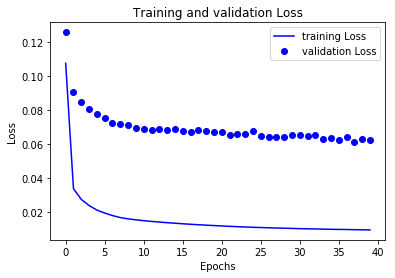

In [77]:
plots(avg_loss0, avg_val_loss0, 'Loss', epochs)

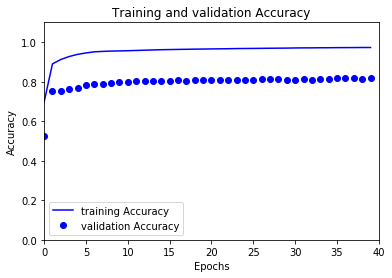

In [78]:
plots(avg_acc0, avg_val_acc0, 'Accuracy', epochs)

In [79]:
# k fold zade shod
ms_train_c0_network = 0
ms_train_c0_network = build_model2('mse')
ms_train_c0_network.fit(cluster_train_0_ready, cat_label_train0, epochs=30, batch_size=64)
# ms_train_c0_network = build_model('categorical_crossentropy')
# ms_train_c0_network.fit(cluster_train_0_ready, cat_label_train0, epochs=20, batch_size=128) #50-1024-98%, 50-3072-97% 60-512-95%, 59-2048-97%

Epoch 1/30
146844/146844 [==============================] - 8s 51us/step - loss: 0.0704 - acc: 0.7832
Epoch 2/30
146844/146844 [==============================] - 7s 48us/step - loss: 0.0293 - acc: 0.8996
Epoch 3/30
146844/146844 [==============================] - 7s 47us/step - loss: 0.0237 - acc: 0.9317
Epoch 4/30
146844/146844 [==============================] - 7s 47us/step - loss: 0.0197 - acc: 0.9438
Epoch 5/30
146844/146844 [==============================] - 7s 47us/step - loss: 0.0180 - acc: 0.9476
Epoch 6/30
146844/146844 [==============================] - 7s 48us/step - loss: 0.0169 - acc: 0.9506
Epoch 7/30
146844/146844 [==============================] - 7s 48us/step - loss: 0.0162 - acc: 0.9523
Epoch 8/30
146844/146844 [==============================] - 7s 47us/step - loss: 0.0155 - acc: 0.9542
Epoch 9/30
146844/146844 [==============================] - 7s 47us/step - loss: 0.0150 - acc: 0.9557
Epoch 10/30
146844/146844 [==============================] - 7s 47us/step - loss: 

In [80]:
print(ms_train_c0_network.evaluate(ids3_pred, cat_train_numerical_label))

209885/209885 [==============================] - 5s 22us/step
[0.09731177905703167, 0.7372465874143629]


In [81]:
prd_c0 = ms_train_c0_network.predict(ids3_pred)
_ = metrics_binary_1node(prd_c0, cat_train_numerical_label)

precision 0.9878857576693896
FPR 0.016111548342045777
TPR 0.6207223134229766
Recall 0.6207223134229766
FNR 0.3792776865763219
specificity 0.9838884516564693
accuracy 0.7372465874165676
F_score 0.7624016139141487
FN 54063.0
FP 1085.0
TP 88479.0
TN 66258.0
Cohens_kappa [0.501]


In [82]:
# cluster1
# scores1, loss1, val_loss1, acc1, val_acc1 = k_fold(5, cluster_train_1_ready, cat_label_train1, 40, build_model2, 'mse', 128)
scores1, loss1, val_loss1, acc1, val_acc1 = k_fold(5, cluster_train_1_ready, cat_label_train1, 40,
                                                   build_model, 'categorical_crossentropy', 1024)

training... please wait
7174/7174 [==============================] - 0s 41us/step
train finished


In [83]:
print(np.mean(scores1))

0.9972121550041818


In [84]:
avg_loss1 = averages(loss1, 40)
avg_val_loss1 = averages(val_loss1, 40)
avg_acc1 = averages(acc1, 40)
avg_val_acc1 = averages(val_acc1, 40) 

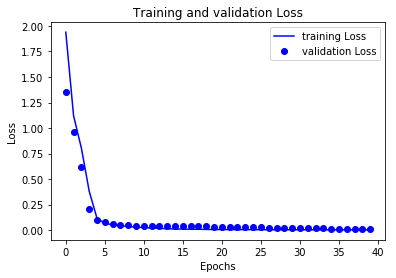

In [85]:
plots(avg_loss1, avg_val_loss1, 'Loss', epochs)

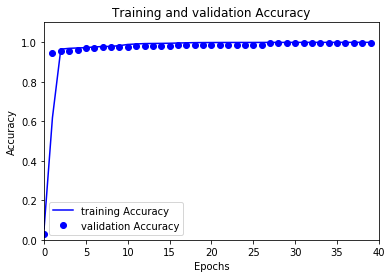

In [86]:
plots(avg_acc1, avg_val_acc1, 'Accuracy', epochs)

In [87]:
# k fold zade shod
ms_train_c1_network = 0
# ms_train_c1_network = build_model('categorical_crossentropy')
# ms_train_c1_network.fit(cluster_train_1_ready, cat_label_train1, epochs=55, batch_size=1024)
ms_train_c1_network = Sequential()
ms_train_c1_network.add(Dense(25, activation='relu', kernel_initializer=initializer, bias_initializer='zeros', input_shape=(25, )))
ms_train_c1_network.add(Dense(15, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'))
ms_train_c1_network.add(Dense(5, activation='sigmoid', kernel_initializer=initializer, bias_initializer='zeros'))

ms_train_c1_network.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# ms_train_c1_network = build_model2('mse')
ms_train_c1_network.fit(cluster_train_1_ready, cat_label_train1, epochs=55, batch_size=512)

Epoch 1/55
35871/35871 [==============================] - 1s 40us/step - loss: 1.8921 - acc: 0.0259
Epoch 2/55
35871/35871 [==============================] - 1s 20us/step - loss: 0.5938 - acc: 0.8584
Epoch 3/55
35871/35871 [==============================] - 1s 20us/step - loss: 0.0668 - acc: 0.9874
Epoch 4/55
35871/35871 [==============================] - 1s 20us/step - loss: 0.0212 - acc: 0.9935
Epoch 5/55
35871/35871 [==============================] - 1s 20us/step - loss: 0.0099 - acc: 0.9971
Epoch 6/55
35871/35871 [==============================] - 1s 19us/step - loss: 0.0063 - acc: 0.9985
Epoch 7/55
35871/35871 [==============================] - 1s 21us/step - loss: 0.0046 - acc: 0.9988
Epoch 8/55
35871/35871 [==============================] - 1s 19us/step - loss: 0.0038 - acc: 0.9990
Epoch 9/55
35871/35871 [==============================] - 1s 19us/step - loss: 0.0033 - acc: 0.9991
Epoch 10/55
35871/35871 [==============================] - 1s 19us/step - loss: 0.0029 - acc: 0.9993

In [88]:
print(ms_train_c1_network.evaluate(ids3_pred, cat_train_numerical_label))
# print(ms_train_c1_network.evaluate(ids_test2_pred/10, cat_test_numerical_label))

209885/209885 [==============================] - 5s 26us/step
[5.416578861749635, 0.40538390070611036]


In [89]:
prd_c1 = ms_train_c1_network.predict(ids3_pred)
_ = metrics_binary_1node(prd_c1, cat_train_numerical_label)

precision 0.5684911939337607
FPR 0.8298709591184981
TPR 0.516528461786339
Recall 0.516528461786339
FNR 0.48347153821295935
specificity 0.17012904088001704
accuracy 0.40538390070733715
F_score 0.5412655030355686
FN 68915.0
FP 55886.0
TP 73627.0
TN 11457.0
Cohens_kappa [-0.298]


In [90]:
# svm for cluster1
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

t1 = time.time()
ovr_svm = OneVsRestClassifier(SVC(random_state=0)).fit(cluster_train_1_ready, cat_label_train1)
t2 = time.time()
print(t2 - t1)

prd_c1_svm = ovr_svm.predict(ids3_pred)
_ = metrics_binary_1node(prd_c1_svm, cat_train_numerical_label)

3.1054205894470215
precision 0.974256956776852
FPR 0.01614124704866706
TPR 0.2886026574621595
Recall 0.2886026574621595
FNR 0.7113973425371389
specificity 0.983858752949848
accuracy 0.5116802058267567
F_score 0.4452959320920746
FN 101404.0
FP 1087.0
TP 41138.0
TN 66256.0
Cohens_kappa [0.196]


In [91]:
# cluster2
# scores2, loss2, val_loss2, acc2, val_acc2 = k_fold(5, cluster_train_2_ready, cat_label_train2, 40, build_model2, 'mse', 128)
scores2, loss2, val_loss2, acc2, val_acc2 = k_fold(5, cluster_train_2_ready, cat_label_train2, 40,
                                                   build_model, 'categorical_crossentropy', 128)

training... please wait
5434/5434 [==============================] - 0s 49us/step
train finished


In [92]:
print(np.mean(scores2))

0.8287081339499027


In [93]:
avg_loss2 = averages(loss2, 40)
avg_val_loss2 = averages(val_loss2, 40)
avg_acc2 = averages(acc2, 40)
avg_val_acc2 = averages(val_acc2, 40) 

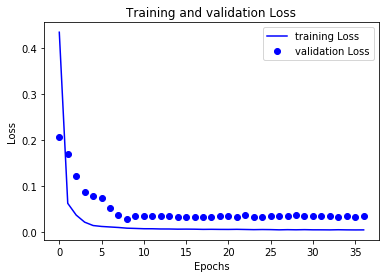

In [94]:
plots(avg_loss2, avg_val_loss2, 'Loss', epochs)

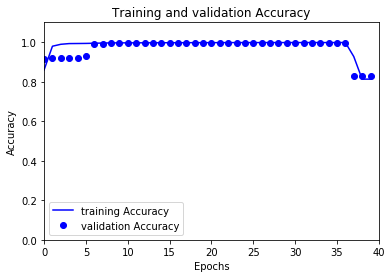

In [95]:
plots(avg_acc2, avg_val_acc2, 'Accuracy', epochs)

In [96]:
ms_train_c2_network = 0
# ms_train_c2_network = build_model('categorical_crossentropy')
# ms_train_c2_network = build_model2('mse')
# ms_train_c2_network.fit(cluster_train_1_ready, cat_label_train1, epochs=30, batch_size=1024)
ms_train_c2_network = Sequential()
ms_train_c2_network.add(Dense(25, activation='relu', kernel_initializer=initializer, bias_initializer='zeros', input_shape=(25, )))
ms_train_c2_network.add(Dense(15, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'))
ms_train_c2_network.add(Dense(5, activation='sigmoid', kernel_initializer=initializer, bias_initializer='zeros'))

ms_train_c2_network.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
ms_train_c2_network.fit(cluster_train_2_ready, cat_label_train2, epochs=40, batch_size=128)

Epoch 1/40
27170/27170 [==============================] - 2s 67us/step - loss: 1.6248 - acc: 0.6824
Epoch 2/40
27170/27170 [==============================] - 1s 31us/step - loss: 0.0558 - acc: 0.9789
Epoch 3/40
27170/27170 [==============================] - 1s 30us/step - loss: 0.0190 - acc: 0.9942
Epoch 4/40
27170/27170 [==============================] - 1s 31us/step - loss: 0.0137 - acc: 0.9951
Epoch 5/40
27170/27170 [==============================] - 1s 32us/step - loss: 0.0116 - acc: 0.9955
Epoch 6/40
27170/27170 [==============================] - 1s 32us/step - loss: 0.0106 - acc: 0.9959
Epoch 7/40
27170/27170 [==============================] - 1s 32us/step - loss: 0.0097 - acc: 0.9961
Epoch 8/40
27170/27170 [==============================] - 1s 32us/step - loss: 0.0092 - acc: 0.9964
Epoch 9/40
27170/27170 [==============================] - 1s 31us/step - loss: 0.0088 - acc: 0.9965
Epoch 10/40
27170/27170 [==============================] - 1s 31us/step - loss: 0.0084 - acc: 0.9966

In [97]:
print(ms_train_c2_network.evaluate(ids3_pred, cat_train_numerical_label))
# print(ms_train_c1_network.evaluate(ids_test2_pred/10, cat_test_numerical_label))

209885/209885 [==============================] - 7s 31us/step
[6.585942919569969, 0.4197679681730471]


In [98]:
prd_c2 = ms_train_c2_network.predict(ids3_pred)
_ = metrics_binary_1node(prd_c2, cat_train_numerical_label)

precision 0.6587981519434281
FPR 0.33118512688723223
TPR 0.30210744903235387
Recall 0.30210744903235387
FNR 0.6978925509669446
specificity 0.6688148731112828
accuracy 0.4197679681728471
F_score 0.4142504907791661
FN 99479.0
FP 22303.0
TP 43063.0
TN 45040.0
Cohens_kappa [-0.022]


In [99]:
# svm for cluster2
t1 = time.time()
ovr_svm2 = OneVsRestClassifier(SVC(random_state=0)).fit(cluster_train_2_ready, cat_label_train2)
t2 = time.time()
print(t2 - t1)

prd_c2_svm = ovr_svm2.predict(ids3_pred)
_ = metrics_binary_1node(prd_c2_svm, cat_train_numerical_label)

/home/siamak/Projects/PycharmProjects/deep/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


2.6751551628112793
precision 0.4088939014042625
FPR 0.941716288254248
TPR 0.3077619228014846
Recall 0.3077619228014846
FNR 0.6922380771978138
specificity 0.05828371174426698
accuracy 0.22771517735892144
F_score 0.35119216647080453
FN 98673.0
FP 63418.0
TP 43869.0
TN 3925.0
Cohens_kappa [-0.557]


In [100]:
lbl_c0_norm = np.array(ms_train_labels)
for i in range(len(lbl_c0_norm)):
    if lbl_c0_norm[i] == 0:
        lbl_c0_norm[i] = 100
for j in range(len(lbl_c0_norm)):
    if lbl_c0_norm[j] != 100:
        lbl_c0_norm[j] = 0
for k in range(len(lbl_c0_norm)):
    if lbl_c0_norm[k] == 100:
        lbl_c0_norm[k] = 1

In [101]:
lbl_c1_norm = np.array(ms_train_labels)
for i in range(len(lbl_c1_norm)):
    if lbl_c1_norm[i] == 1:
        lbl_c1_norm[i] = 100
for j in range(len(lbl_c1_norm)):
    if lbl_c1_norm[j] != 100:
        lbl_c1_norm[j] = 0
for k in range(len(lbl_c1_norm)):
    if lbl_c1_norm[k] == 100:
        lbl_c1_norm[k] = 1

In [102]:
lbl_c2_norm = np.array(ms_train_labels)
for i in range(len(lbl_c2_norm)):
    if lbl_c2_norm[i] == 2:
        lbl_c2_norm[i] = 100
for j in range(len(lbl_c2_norm)):
    if lbl_c2_norm[j] != 100:
        lbl_c2_norm[j] = 0
for k in range(len(lbl_c2_norm)):
    if lbl_c2_norm[k] == 100:
        lbl_c2_norm[k] = 1

In [103]:
print(lbl_c0_norm[:25].T)
print(lbl_c1_norm[:25].T)
print(lbl_c2_norm[:25].T)

[[1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0]]
[[0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1]]
[[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [104]:
lbl_c0_norm = np.reshape(lbl_c0_norm, (-1, 1))
lbl_c1_norm = np.reshape(lbl_c1_norm, (-1, 1))
lbl_c2_norm = np.reshape(lbl_c2_norm, (-1, 1))

In [106]:
result_c0_norm = ms_train_c0_network.predict(ids3_pred)
result_c1_norm = ovr_svm.predict(ids3_pred)
result_c2_norm = ms_train_c2_network.predict(ids3_pred)

In [107]:
res0_norm = result_c0_norm * lbl_c0_norm
res1_norm = result_c1_norm * lbl_c1_norm
res2_norm = result_c2_norm * lbl_c2_norm

In [108]:
final_result_with_degree = np.hstack((res0_norm, res1_norm, res2_norm))
final_result_without_degree = np.hstack((result_c0_norm, result_c1_norm, result_c2_norm))

In [109]:
print(final_result_with_degree[:20])
print('**********************************************************')
print(final_result_without_degree[:20])

[[ 1.01  -0.014  0.002  0.008 -0.001  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.021 -0.011  0.983  0.004  0.003  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.    -0.    -0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 1.006  0.004 -0.006 -0.004 -0.007  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.996  0.011 -0.007 -0.004 -0.007  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.     0.     0.     0.
   0.     0.003  0.     0.     0.   ]
 [ 0.     0.    -0.    -0.    -0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.    -0.    -0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.    -0.    -0.    

In [110]:
# faze test
# cluster0
# score0_test, loss0_test, val_loss0_test, acc0_test, val_acc0_test = k_fold(5,
#                                                                            cluster_test_0_ready,
#                                                                            cat_label_test0,
#                                                                           40, build_model,
#                                                                           'categorical_crossentropy',
#                                                                           8)

score0_test, loss0_test, val_loss0_test, acc0_test, val_acc0_test = k_fold(5,
                                                                           cluster_test_0_ready,
                                                                           cat_label_test0,
                                                                          40, build_model2,
                                                                          'mse', 32)

training... please wait
3165/3165 [==============================] - 0s 60us/step
train finished


In [111]:
print(np.mean(score0_test))

0.9370616113216768


In [112]:
avg_loss0_test = averages(loss0_test, 40)
avg_val_loss0_test = averages(val_loss0_test, 40)
avg_acc0_test = averages(acc0_test, 40)
avg_val_acc0_test = averages(val_acc0_test, 40)

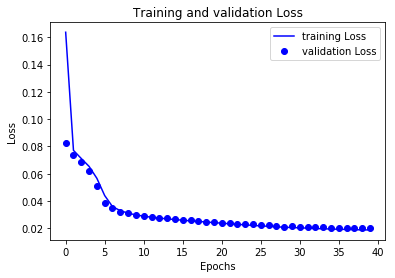

In [113]:
plots(avg_loss0_test, avg_val_loss0_test, 'Loss', epochs)

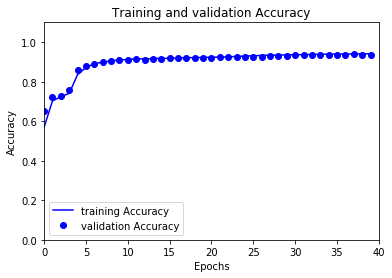

In [114]:
plots(avg_acc0_test, avg_val_acc0_test, 'Accuracy', epochs)

In [115]:
ms_c0_network_test = 0
ms_c0_network_test = build_model2('mse')
ms_c0_network_test.fit(cluster_test_0_ready, cat_label_test0, epochs=40, batch_size=64)

# ms_c0_network_test = build_model('categorical_crossentropy')
# ms_c0_network_test.fit(cluster_test_0_ready, cat_label_test0, epochs=39, batch_size=32)#39-32-74%, 35-256-72%

Epoch 1/40
15828/15828 [==============================] - 2s 141us/step - loss: 0.2062 - acc: 0.5306
Epoch 2/40
15828/15828 [==============================] - 1s 62us/step - loss: 0.0823 - acc: 0.6785
Epoch 3/40
15828/15828 [==============================] - 1s 63us/step - loss: 0.0739 - acc: 0.7211
Epoch 4/40
15828/15828 [==============================] - 1s 58us/step - loss: 0.0696 - acc: 0.7274
Epoch 5/40
15828/15828 [==============================] - 1s 56us/step - loss: 0.0644 - acc: 0.7359
Epoch 6/40
15828/15828 [==============================] - 1s 57us/step - loss: 0.0569 - acc: 0.8343
Epoch 7/40
15828/15828 [==============================] - 1s 60us/step - loss: 0.0462 - acc: 0.8707
Epoch 8/40
15828/15828 [==============================] - 1s 59us/step - loss: 0.0374 - acc: 0.8891
Epoch 9/40
15828/15828 [==============================] - 1s 59us/step - loss: 0.0339 - acc: 0.8959
Epoch 10/40
15828/15828 [==============================] - 1s 59us/step - loss: 0.0320 - acc: 0.902

In [116]:
print(ms_c0_network_test.evaluate(ids_test2_pred, cat_test_numerical_label))

22544/22544 [==============================] - 1s 61us/step
[0.0882506883426221, 0.7762597586941093]


In [117]:
# svm for cluster0 test
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

t1 = time.time()
ovr_svm_c0_test = OneVsRestClassifier(SVC(random_state=0)).fit(cluster_test_0_ready, cat_label_test0)
t2 = time.time()
print(t2 - t1)

prd_c0_test_svm = ovr_svm_c0_test.predict(ids_test2_pred)
_ = metrics_binary_1node(prd_c0_test_svm, cat_test_numerical_label)

9.850661516189575
precision 0.9355790127144431
FPR 0.042735042734602664
TPR 0.46964856229665974
Recall 0.46964856229665974
FNR 0.5303514376955477
specificity 0.9572649572550996
accuracy 0.6796930447095472
F_score 0.6253696052958747
FN 6806.0
FP 415.0
TP 6027.0
TN 9296.0
Cohens_kappa [0.395]


In [118]:
# cluster1
# score1_test, loss1_test, val_loss1_test, acc1_test, val_acc1_test = k_fold(5,
#                                                                            cluster_test_1_ready,
#                                                                            cat_label_test1,
#                                                                           40, build_model,
#                                                                           'categorical_crossentropy',
#                                                                           128)

score1_test, loss1_test, val_loss1_test, acc1_test, val_acc1_test = k_fold(5,
                                                                           cluster_test_1_ready,
                                                                           cat_label_test1,
                                                                          40, build_model2,
                                                                          'mse', 128)

training... please wait
836/836 [==============================] - 0s 61us/step
train finished


In [119]:
print(np.mean(score1_test))

0.9832535885167465


In [120]:
avg_loss1_test = averages(loss1_test, 40)
avg_val_loss1_test = averages(val_loss1_test, 40)
avg_acc1_test = averages(acc1_test, 40)
avg_val_acc1_test = averages(val_acc1_test, 40)

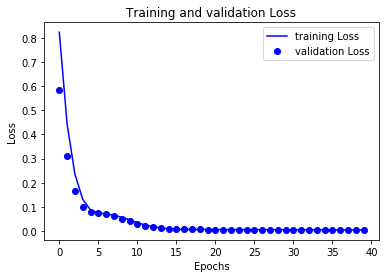

In [121]:
plots(avg_loss1_test, avg_val_loss1_test, 'Loss', epochs)

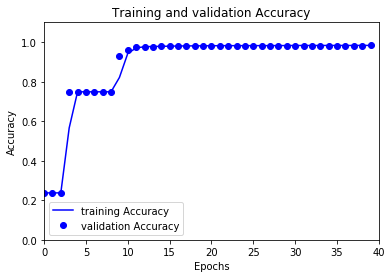

In [122]:
plots(avg_acc1_test, avg_val_acc1_test, 'Accuracy', epochs)

In [123]:
# k fold zade shod
ms_c1_network_test = 0
ms_c1_network_test = build_model('categorical_crossentropy')
ms_c1_network_test.fit(cluster_test_1_ready, cat_label_test1, epochs=40, batch_size=128)

# ms_c1_network_test = build_model2('mse')
# ms_c1_network_test.fit(cluster_test_1_ready, cat_label_test1, epochs=40, batch_size=16)

Epoch 1/40
4181/4181 [==============================] - 2s 431us/step - loss: 0.7520 - acc: 0.7630
Epoch 2/40
4181/4181 [==============================] - 0s 41us/step - loss: 0.3482 - acc: 0.8873
Epoch 3/40
4181/4181 [==============================] - 0s 44us/step - loss: 0.1853 - acc: 0.9605
Epoch 4/40
4181/4181 [==============================] - 0s 44us/step - loss: 0.1268 - acc: 0.9665
Epoch 5/40
4181/4181 [==============================] - 0s 40us/step - loss: 0.0961 - acc: 0.9756
Epoch 6/40
4181/4181 [==============================] - 0s 40us/step - loss: 0.0802 - acc: 0.9778
Epoch 7/40
4181/4181 [==============================] - 0s 44us/step - loss: 0.0708 - acc: 0.9780
Epoch 8/40
4181/4181 [==============================] - 0s 46us/step - loss: 0.0649 - acc: 0.9785
Epoch 9/40
4181/4181 [==============================] - 0s 44us/step - loss: 0.0591 - acc: 0.9785
Epoch 10/40
4181/4181 [==============================] - 0s 42us/step - loss: 0.0557 - acc: 0.9797
Epoch 11/40
4181/4

In [124]:
print(ms_c1_network_test.evaluate(ids_test2_pred, cat_test_numerical_label))

22544/22544 [==============================] - 2s 71us/step
[4.216429004439062, 0.2956884315117104]


In [125]:
prd_c1_test_svm = ms_c1_network_test.predict(ids_test2_pred)
_ = metrics_binary_1node(prd_c1_test_svm, cat_test_numerical_label)

precision 0.3879773379413731
FPR 0.8565544228106625
TPR 0.41089378944587474
Recall 0.41089378944587474
FNR 0.5891062105463328
specificity 0.14344557717903977
accuracy 0.2956884315103988
F_score 0.399106822578245
FN 7560.0
FP 8318.0
TP 5273.0
TN 1393.0
Cohens_kappa [-0.45]


In [126]:
# svm for cluster1 test 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

t1 = time.time()
ovr_svm_c1_test = OneVsRestClassifier(SVC(random_state=0)).fit(cluster_test_1_ready, cat_label_test1)
t2 = time.time()
print(t2 - t1)

prd_c1_test_svm = ovr_svm_c1_test.predict(ids_test2_pred)

_ = metrics_binary_1node(prd_c1_test_svm, cat_test_numerical_label)

/home/siamak/Projects/PycharmProjects/deep/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


0.3284108638763428
precision 0.36552583267528505
FPR 0.9964988157656626
TPR 0.43442686822695836
Recall 0.43442686822695836
FNR 0.5655731317652491
specificity 0.0035011842240397365
accuracy 0.2488023420854826
F_score 0.3970090299479567
FN 7258.0
FP 9677.0
TP 5575.0
TN 34.0
Cohens_kappa [-0.58]


In [127]:
# cluster2
score2_test, loss2_test, val_loss2_test, acc2_test, val_acc2_test = k_fold(5,
                                                                           cluster_test_2_ready,
                                                                           cat_label_test2,
                                                                          40, build_model,
                                                                          'categorical_crossentropy',
                                                                          128)

# score2_test, loss2_test, val_loss2_test, acc2_test, val_acc2_test = k_fold(5,
#                                                                            cluster_test_2_ready,
#                                                                            cat_label_test2,
#                                                                           40, build_model2,
#                                                                           'mse', 128)

training... please wait
507/507 [==============================] - 0s 68us/step
train finished


In [128]:
print(np.mean(score2_test))

0.9822485211803128


In [129]:
avg_loss2_test = averages(loss2_test, 40)
avg_val_loss2_test = averages(val_loss2_test, 40)
avg_acc2_test = averages(acc2_test, 40)
avg_val_acc2_test = averages(val_acc2_test, 40)

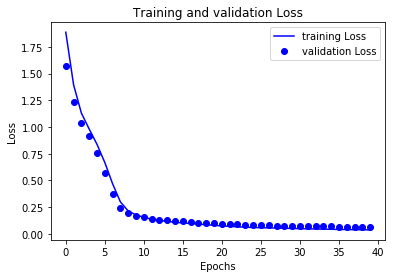

In [130]:
plots(avg_loss2_test, avg_val_loss2_test, 'Loss', epochs)

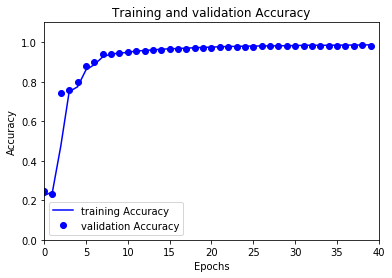

In [131]:
plots(avg_acc2_test, avg_val_acc2_test, 'Accuracy', epochs)

In [132]:
ms_c2_network_test = 0
# ms_c2_network_test = build_model('categorical_crossentropy')
# ms_c2_network_test.fit(cluster_test_2_ready, cat_label_test2, epochs=40, batch_size=128)
ms_c2_network_test = Sequential()
ms_c2_network_test.add(Dense(5, activation='tanh', kernel_initializer=initializer, bias_initializer='zeros', input_shape=(25, )))
# ms_c2_network_test.add(Dense(10, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'))
# ms_c2_network_test.add(Dense(5, activation='sigmoid', kernel_initializer=initializer, bias_initializer='zeros'))
ms_c2_network_test.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
ms_c2_network_test.fit(cluster_test_2_ready, cat_label_test2, epochs=60, batch_size=32)
# ms_c2_network_test = build_model2('mse')
# ms_c2_network_test.fit(cluster_test_2_ready, cat_label_test2, epochs=40, batch_size=128)

Epoch 1/60
2535/2535 [==============================] - 2s 755us/step - loss: 1.3569 - acc: 0.0122
Epoch 2/60
2535/2535 [==============================] - 0s 87us/step - loss: 1.1612 - acc: 0.0694
Epoch 3/60
2535/2535 [==============================] - 0s 86us/step - loss: 0.9361 - acc: 0.1373
Epoch 4/60
2535/2535 [==============================] - 0s 92us/step - loss: 0.4950 - acc: 0.6406
Epoch 5/60
2535/2535 [==============================] - 0s 94us/step - loss: 0.3050 - acc: 0.8284
Epoch 6/60
2535/2535 [==============================] - 0s 81us/step - loss: 0.2202 - acc: 0.8817
Epoch 7/60
2535/2535 [==============================] - 0s 89us/step - loss: 0.1961 - acc: 0.8911
Epoch 8/60
2535/2535 [==============================] - 0s 89us/step - loss: 0.1750 - acc: 0.8951
Epoch 9/60
2535/2535 [==============================] - 0s 94us/step - loss: 0.1586 - acc: 0.8998
Epoch 10/60
2535/2535 [==============================] - 0s 88us/step - loss: 0.1443 - acc: 0.9085
Epoch 11/60
2535/2

In [133]:
print(ms_c2_network_test.evaluate(ids_test2_pred, cat_test_numerical_label))

22544/22544 [==============================] - 2s 76us/step
[0.4816074127039222, 0.2956884315117104]


In [134]:
prd_c2_test = ms_c2_network_test.predict(ids_test2_pred)
_ = metrics_binary_1node(prd_c2_test, cat_test_numerical_label)

precision 0.4070229007608731
FPR 0.9998970239831129
TPR 0.5193641393242471
Recall 0.5193641393242471
FNR 0.48063586066796044
specificity 0.000102976006589404
accuracy 0.2956884315103988
F_score 0.4563817639340409
FN 6168.0
FP 9710.0
TP 6665.0
TN 1.0
Cohens_kappa [-0.503]


In [135]:
# svm for cluster2 test 
t1 = time.time()
ovr_svm_c2_test = OneVsRestClassifier(SVC(random_state=0)).fit(cluster_test_2_ready, cat_label_test2)
t2 = time.time()
print(t2 - t1)

prd_c2_test_svm = ovr_svm_c2_test.predict(ids_test2_pred)
_ = metrics_binary_1node(prd_c2_test_svm, cat_test_numerical_label)

0.2395007610321045
precision 0.4693520140079392
FPR 0.9984553598908613
TPR 0.6682770981012368
Recall 0.6682770981012368
FNR 0.33172290189097076
specificity 0.00154464009884106
accuracy 0.3810770049663721
F_score 0.551422552393276
FN 4257.0
FP 9696.0
TP 8576.0
TN 15.0
Cohens_kappa [-0.354]


In [136]:
result_c0_test = ms_c0_network_test.predict(ids_test2_pred)
result_c1_test = ms_c1_network_test.predict(ids_test2_pred)
result_c2_test = ovr_svm_c2_test.predict(ids_test2_pred)

In [137]:
print(result_c0_test[:20])
print('*******************************************************************')
print(result_c1_test[:20])
print('*******************************************************************')
print(result_c2_test[:20])

[[-0.071 -0.021  1.074  0.008 -0.014]
 [-0.044 -0.037  1.061 -0.007 -0.008]
 [ 0.896  0.033  0.039  0.016  0.033]
 [-0.035  0.038  0.979  0.041 -0.026]
 [-0.043 -0.041  1.041  0.008 -0.009]
 [ 0.988  0.007  0.007  0.003 -0.004]
 [ 0.874  0.043  0.114  0.045  0.026]
 [ 0.016  0.013  0.019  0.953  0.004]
 [ 0.988  0.007  0.007  0.003 -0.004]
 [ 0.039  0.005 -0.017  0.968  0.014]
 [-0.027  0.632  0.108  0.251  0.01 ]
 [ 0.943  0.028  0.034  0.013  0.021]
 [-0.035 -0.042  1.056 -0.012 -0.006]
 [-0.021  0.01   0.147  0.882  0.001]
 [ 0.919  0.038  0.054  0.014  0.019]
 [ 0.991  0.006  0.005  0.002 -0.005]
 [ 1.015 -0.02   0.005  0.002  0.01 ]
 [ 0.991  0.006  0.005  0.002 -0.005]
 [ 0.993  0.005  0.005  0.001 -0.   ]
 [-0.069 -0.023  1.073  0.007 -0.014]]
*******************************************************************
[[0.    0.519 0.    0.    0.   ]
 [0.    0.284 0.    0.    0.   ]
 [0.46  0.    0.529 0.    0.   ]
 [0.111 0.    0.999 0.    0.   ]
 [0.004 0.    0.001 0.169 0.   ]
 [0.01

In [138]:
lbl_c0_test = np.array(ms_test_labels)
for i in range(len(lbl_c0_test)):
    if lbl_c0_test[i] == 0:
        lbl_c0_test[i] = 100
for j in range(len(lbl_c0_test)):
    if lbl_c0_test[j] != 100:
        lbl_c0_test[j] = 0
for k in range(len(lbl_c0_test)):
    if lbl_c0_test[k] == 100:
        lbl_c0_test[k] = 1

In [139]:
lbl_c1_test = np.array(ms_test_labels)
for i in range(len(lbl_c1_test)):
    if lbl_c1_test[i] == 1:
        lbl_c1_test[i] = 100
for j in range(len(lbl_c1_test)):
    if lbl_c1_test[j] != 100:
        lbl_c1_test[j] = 0
for k in range(len(lbl_c1_test)):
    if lbl_c1_test[k] == 100:
        lbl_c1_test[k] = 1

In [140]:
lbl_c2_test = np.array(ms_test_labels)
for i in range(len(lbl_c2_test)):
    if lbl_c2_test[i] == 2:
        lbl_c2_test[i] = 100
for j in range(len(lbl_c2_test)):
    if lbl_c2_test[j] != 100:
        lbl_c2_test[j] = 0
for k in range(len(lbl_c2_test)):
    if lbl_c2_test[k] == 100:
        lbl_c2_test[k] = 1

In [141]:
print(lbl_c0_test[:25].T)
print(lbl_c1_test[:25].T)
print(lbl_c2_test[:25].T)

[[0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0]]
[[1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]]


In [142]:
lbl_c0_test = np.reshape(lbl_c0_test, (-1, 1))
lbl_c1_test = np.reshape(lbl_c1_test, (-1, 1))
lbl_c2_test = np.reshape(lbl_c2_test, (-1, 1))

In [143]:
res0_test = result_c0_test * lbl_c0_test
res1_test = result_c1_test * lbl_c1_test
res2_test = result_c2_test * lbl_c2_test

In [144]:
final_result_with_degree_test = np.hstack((res0_test, res1_test, res2_test))
final_result_without_degree_test = np.hstack((result_c0_test, result_c1_test, result_c2_test))

In [145]:
print(final_result_with_degree_test[:10])
print('*****************************************************************************')
print(final_result_without_degree_test[:10])

[[-0.    -0.     0.     0.    -0.     0.     0.519  0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [-0.    -0.     0.    -0.    -0.     0.     0.284  0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.896  0.033  0.039  0.016  0.033  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [-0.035  0.038  0.979  0.041 -0.026  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [-0.043 -0.041  1.041  0.008 -0.009  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.988  0.007  0.007  0.003 -0.004  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.874  0.043  0.114  0.045  0.026  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.016  0.013  0.019  0.953  0.004  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.988  0.007  0.007  0.003 -0.004  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.   ]
 [ 0.039  0.005 -0.017  0.968  0.014 

In [146]:
val_X = final_result_with_degree[:20000]
val_y = cat_train_numerical_label[:20000]
partial_X = final_result_with_degree[20000:]
partial_y = cat_train_numerical_label[20000:]

val_X_without_degree = final_result_without_degree[:20000]
val_y_without_degree = cat_train_numerical_label[:20000]
partial_X_without_degree = final_result_without_degree[20000:]
partial_y_without_degree = cat_train_numerical_label[20000:]


In [148]:
final_model = 0
final_model = Sequential()
final_model.add(Dense(10, activation='relu', kernel_initializer=initializer, input_shape=(15,)))
final_model.add(Dense(5, activation='softmax', kernel_initializer=initializer))
final_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

histor = final_model.fit(partial_X, partial_y,
                         batch_size=32, epochs=40,
                         validation_data=(val_X, val_y))

# final_model.add(Dense(10, activation='sigmoid', kernel_initializer=initializer, input_shape=(10,)))
# final_model.add(Dense(5, activation='linear', kernel_initializer=initializer))
# final_model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# histor = final_model.fit(partial_X, partial_y,
#                          batch_size=128, epochs=40,
#                          validation_data=(val_X, val_y))

Train on 189885 samples, validate on 20000 samples
Epoch 1/40
189885/189885 [==============================] - 18s 97us/step - loss: 0.2721 - acc: 0.9137 - val_loss: 0.1584 - val_acc: 0.9231
Epoch 2/40
189885/189885 [==============================] - 16s 87us/step - loss: 0.1466 - acc: 0.9467 - val_loss: 0.1484 - val_acc: 0.9258
Epoch 3/40
189885/189885 [==============================] - 17s 88us/step - loss: 0.1378 - acc: 0.9523 - val_loss: 0.1451 - val_acc: 0.9357
Epoch 4/40
189885/189885 [==============================] - 17s 87us/step - loss: 0.1319 - acc: 0.9578 - val_loss: 0.1417 - val_acc: 0.9445
Epoch 5/40
189885/189885 [==============================] - 16s 85us/step - loss: 0.1270 - acc: 0.9625 - val_loss: 0.1355 - val_acc: 0.9525
Epoch 6/40
189885/189885 [==============================] - 16s 86us/step - loss: 0.1223 - acc: 0.9660 - val_loss: 0.1323 - val_acc: 0.9556
Epoch 7/40
189885/189885 [==============================] - 16s 87us/step - loss: 0.1178 - acc: 0.9682 - val_

In [149]:
val_loss = histor.history['val_loss']
loss = histor.history['loss']

accuracy = histor.history['acc']
val_accuracy = histor.history['val_acc']

In [150]:
epochs = range(40)

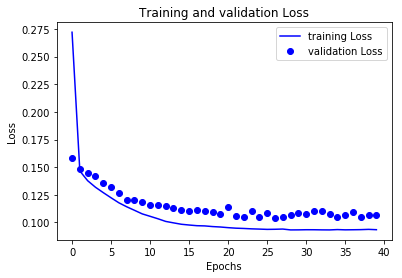

In [151]:
plots(loss, val_loss, 'Loss', epochs)

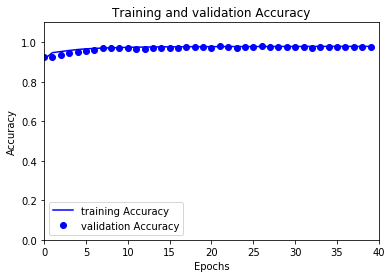

In [152]:
plots(accuracy, val_accuracy, 'Accuracy', epochs)

In [153]:
def newsig(weight_matrix):
    return 10 * (1 / (1 + (K.exp(-0.05 * weight_matrix))))

In [154]:
from keras import regularizers

In [358]:
final_model = 0
final_model = Sequential()
final_model.add(Dense(5, activation='tanh', kernel_initializer=initializer, bias_initializer='zeros', input_shape=(15,)))
# final_model.add(Dense(15, activation='tanh', kernel_initializer=initializer))
# final_model.add(Dense(15, activation='tanh', kernel_initializer=initializer))
# final_model.add(Dense(25, activation='tanh', kernel_initializer=initializer))
# final_model.add(Dense(15, activation='tanh', kernel_initializer=initializer))
# final_model.add(Dense(10, activation='tanh', kernel_initializer=initializer))
# final_model.add(Dense(5, activation='linear', kernel_initializer=initializer))

final_model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
final_model.fit(final_result_with_degree, cat_train_numerical_label, batch_size=512, epochs=30, shuffle=False)

Epoch 1/30
209885/209885 [==============================] - 5s 24us/step - loss: 0.3331 - acc: 0.1509
Epoch 2/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.1748 - acc: 0.3168
Epoch 3/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.1048 - acc: 0.5646
Epoch 4/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0780 - acc: 0.7702
Epoch 5/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0626 - acc: 0.8410
Epoch 6/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0546 - acc: 0.8261
Epoch 7/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0495 - acc: 0.8213
Epoch 8/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0466 - acc: 0.8419
Epoch 9/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0448 - acc: 0.8426
Epoch 10/30
209885/209885 [==============================] - 2s 8us/step - loss: 0.0433 - 

In [359]:
print(final_model.evaluate(final_result_with_degree_test, cat_test_numerical_label))

22544/22544 [==============================] - 3s 149us/step
[0.0765531347777676, 0.9545777146912704]


In [360]:
prdd = final_model.predict(final_result_with_degree_test)

In [361]:
print(prdd[:20])
print('-----------------------------------------------')
print(cat_test_numerical_label[:20])

[[-0.121  0.989  0.148  0.047  0.036]
 [-0.113  0.937  0.216  0.047  0.037]
 [ 0.915  0.018  0.043  0.107  0.081]
 [-0.201  0.012  0.901  0.102  0.07 ]
 [-0.205 -0.061  0.919  0.063  0.072]
 [ 0.939 -0.004 -0.002  0.094  0.082]
 [ 0.908 -0.025  0.13   0.135  0.084]
 [ 0.015  0.019  0.009  0.741  0.079]
 [ 0.939 -0.004 -0.002  0.094  0.082]
 [ 0.061  0.008 -0.047  0.747  0.08 ]
 [-0.243  0.66   0.172  0.344  0.043]
 [ 0.928 -0.002  0.028  0.105  0.083]
 [-0.111  0.904  0.232  0.047  0.037]
 [-0.999  1.    -1.     0.207 -0.957]
 [ 0.922  0.006  0.057  0.106  0.082]
 [ 0.94  -0.003 -0.004  0.093  0.082]
 [ 0.946 -0.045 -0.008  0.092  0.085]
 [ 0.94  -0.003 -0.004  0.093  0.082]
 [ 0.94  -0.008 -0.005  0.092  0.083]
 [-0.122  0.992  0.138  0.047  0.036]]
-----------------------------------------------
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 

In [362]:
_ = metrics_binary_1node(prdd, cat_test_numerical_label)

precision 0.9656913005681387
FPR 0.04479456286639075
TPR 0.954102703958902
Recall 0.954102703958902
FNR 0.04589729603330556
specificity 0.9552054371233116
accuracy 0.9545777146870361
F_score 0.9598619757076895
FN 589.0
FP 435.0
TP 12244.0
TN 9276.0
Cohens_kappa [0.908]


In [200]:
siamak2 = time.time()
print(siamak2 - siamak)